## 피마 당뇨병 데이터 세트
- Pregnancies : 임신횟수
- Glucose : 포도당 부하 검사 수치
- BloodPressure : 혈압
- SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값
- Insulin : 혈청 인슐린
- BMI : 체질량 지수
- DiabetesPedigreeFunction : 당뇨 내력 가중치 값
- Age : 나이
- Outcome : 당뇨여부(0 또는 1)

## 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

diabetes_data = pd.read_csv(r'C:\Users\alswl\Downloads\archive\diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


전체 768개의 데이터 중 Negative 값이 500개, Positive 값이 268개로 구성

In [2]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Null 값은 존재하지 않으며 모두 int, float의 숫자형 데이터

Null 값과 문자열 처리를 위한 별도의 피처 인코딩은 필요하지 않음

## 로지스틱 회귀

In [3]:
# 성능 평가지표 출력 함수 (Chapter 03)
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [4]:
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

In [5]:
# 피쳐 데이터 세트 X, 레이블 데이터 세트 y 를 추출
X = diabetes_data.iloc[:,:-1]
y = diabetes_data['Outcome']

# 데이터를 훈련과 테스트 데이터 셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

오차행렬:
 [[88 12]
 [23 31]]

정확도: 0.7727
정밀도: 0.7209
재현율: 0.5741
F1: 0.6392
AUC: 0.7270


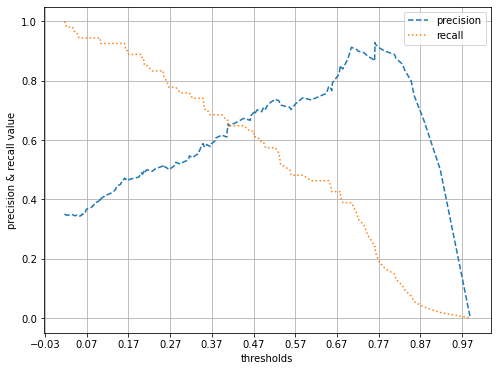

In [6]:
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba)

임계값을 약 0.42 정도로 맞추면 정밀도와 재현율이 균형을 이룰 것으로 보임

그러나 정밀도, 재현율 모두 0.7이 조금 되지 않는 수준으로 그렇게 높은 것은 아님

: 데이터 값 재점검

In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

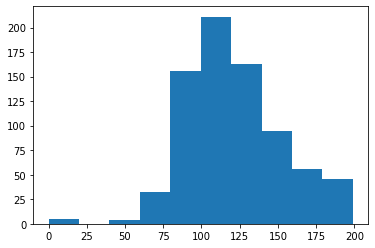

In [8]:
plt.hist(diabetes_data['Glucose'], bins=10)

최소 값이 0으로 되어 있는 값들이 존재

Glucose(당 수치), BloodPressure(혈압), SkinThickness(피하지방), Insulin(인슐린), BMI(체질량 지수) 같은 값이 실제로 0일 수는 없다고 생각되므로 확인

(Pregnancies는 출산 횟수를 의미하므로 제외)

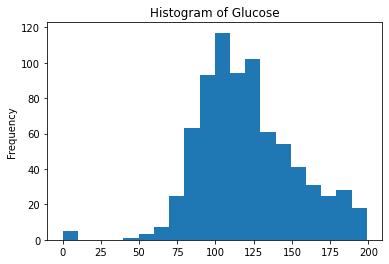

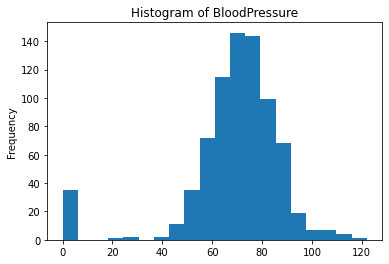

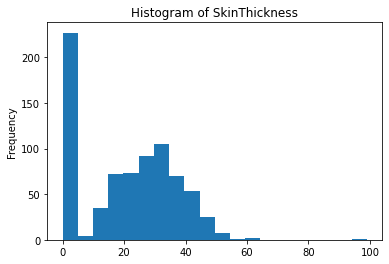

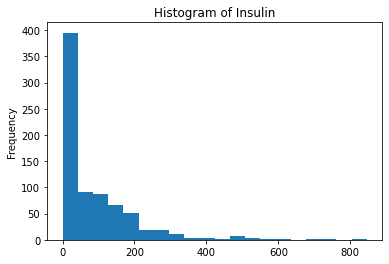

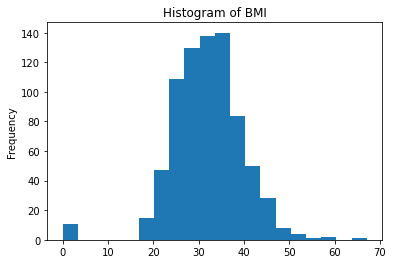

In [11]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

def hist_plot(df):
    for feature in zero_features:
        df[feature].plot(kind='hist', bins=20).set_title('Histogram of '+ feature)
        plt.show()

hist_plot(diabetes_data)

In [12]:
#0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

#피처별로 반복하면서 데이터 값이 0인 건수 추출, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count,
                                                100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


SkinThickness와 Insulin의 경우 0 값의 비율이 각각 29.56%, 48.70%로 상당히 높음

이들 데이터를 삭제하기에는 너무 많으므로 피처 0 값을 평균 값으로 대체

In [13]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [16]:
# 데이터 세트에 대해 피처 스케일링을 적용하여 변환하기
#(로지스틱 회귀의 경우, 숫자 데이터에 스케일링을 적용하는 것이 일반적으로 성능이 좋음)

X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 상용하여 데이터 세트에 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size = 0.2, random_state=156,
                                                    stratify = y)

# 로지스틱 회귀로 학습, 예측, 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train,  y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

오차행렬:
 [[90 10]
 [21 33]]

정확도: 0.7987
정밀도: 0.7674
재현율: 0.6111
F1: 0.6804
AUC: 0.7556


In [18]:
# 평가지표를 조사하기 위한 새로운 함수 생성
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 iteration 하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [19]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


임계값:  0.3
오차행렬:
 [[67 33]
 [11 43]]

정확도: 0.7143
정밀도: 0.5658
재현율: 0.7963
F1: 0.6615
AUC: 0.7331

임계값:  0.33
오차행렬:
 [[72 28]
 [12 42]]

정확도: 0.7403
정밀도: 0.6000
재현율: 0.7778
F1: 0.6774
AUC: 0.7489

임계값:  0.36
오차행렬:
 [[76 24]
 [15 39]]

정확도: 0.7468
정밀도: 0.6190
재현율: 0.7222
F1: 0.6667
AUC: 0.7411

임계값:  0.39
오차행렬:
 [[78 22]
 [16 38]]

정확도: 0.7532
정밀도: 0.6333
재현율: 0.7037
F1: 0.6667
AUC: 0.7419

임계값:  0.42
오차행렬:
 [[84 16]
 [18 36]]

정확도: 0.7792
정밀도: 0.6923
재현율: 0.6667
F1: 0.6792
AUC: 0.7533

임계값:  0.45
오차행렬:
 [[85 15]
 [18 36]]

정확도: 0.7857
정밀도: 0.7059
재현율: 0.6667
F1: 0.6857
AUC: 0.7583

임계값:  0.48
오차행렬:
 [[88 12]
 [19 35]]

정확도: 0.7987
정밀도: 0.7447
재현율: 0.6481
F1: 0.6931
AUC: 0.7641

임계값:  0.5
오차행렬:
 [[90 10]
 [21 33]]

정확도: 0.7987
정밀도: 0.7674
재현율: 0.6111
F1: 0.6804
AUC: 0.7556


In [20]:
# 임계값을 0.48로 설정하여 예측 수행
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 predict_proba() 예측확률의 array에서 1에 해당하는 컬럼 값을 대입하여 Binarizer 반환하기
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048)

오차행렬:
 [[88 12]
 [19 35]]

정확도: 0.7987
정밀도: 0.7447
재현율: 0.6481
F1: 0.6931
AUC: 0.7641
